C:\Users\PeeCee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


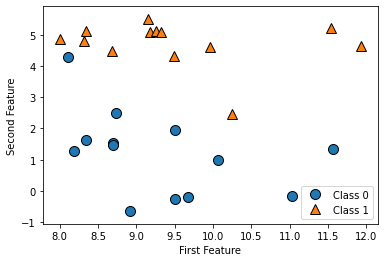

In [2]:

import mglearn
import matplotlib.pyplot as plt

# generate dataset

X, y = mglearn.datasets.make_forge()

# plot dataset

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
print('X.shape: {}'.format(X.shape))

Text(0, 0.5, 'Target')

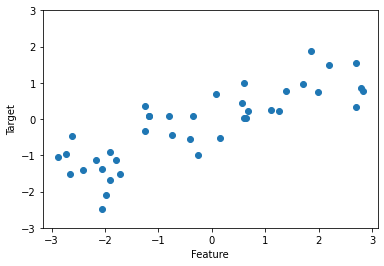

In [3]:
# plot the wave of the dataset, with the x axis showing the feature and the y-axis showing the regression target
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [4]:
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer

print('cancer.keys(): \n{}'.format(cancer.keys()))

AttributeError: 'function' object has no attribute 'keys'

In [5]:
print("Shape of cancer data: {}".format(cancer.data.shape))

AttributeError: 'function' object has no attribute 'data'

In [6]:
from sklearn.datasets import load_boston

boston = load_boston()

print('Data shape: {}'.format(boston.data.shape))

Data shape: (506, 13)


In [7]:
X, y = mglearn.datasets.load_extended_boston()

print('X.shape: {}'.format(X.shape))

X.shape: (506, 104)


C:\Users\PeeCee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


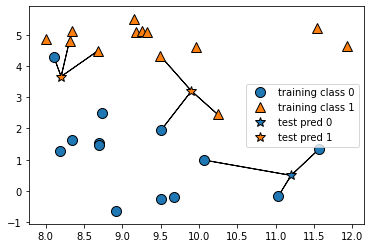

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [12]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
print('Test set predicions: {}'.format(clf.predict(X_test)))

Test set predicions: [1 0 1 0 1 0 0]


In [14]:
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


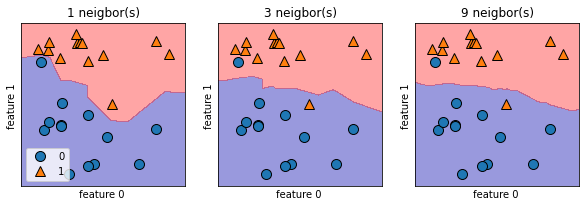

In [15]:
fig, axes = plt.subplots(1,3, figsize= (10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title('{} neigbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0 ')
    ax.set_ylabel('feature 1 ')
axes[0].legend(loc=3)

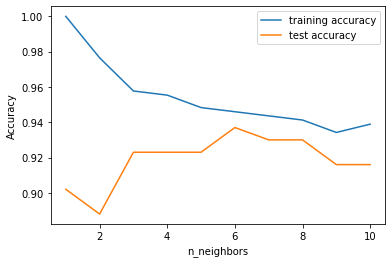

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = 'training accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

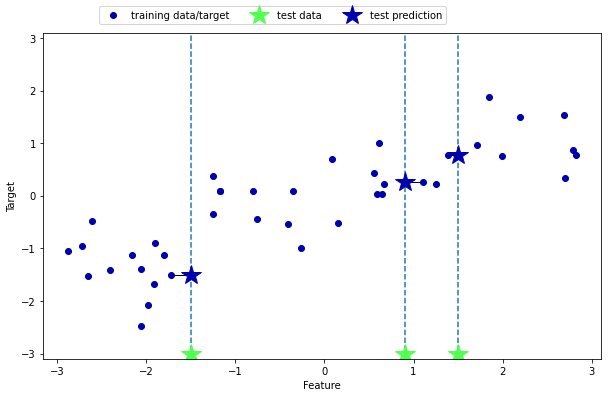

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=1)


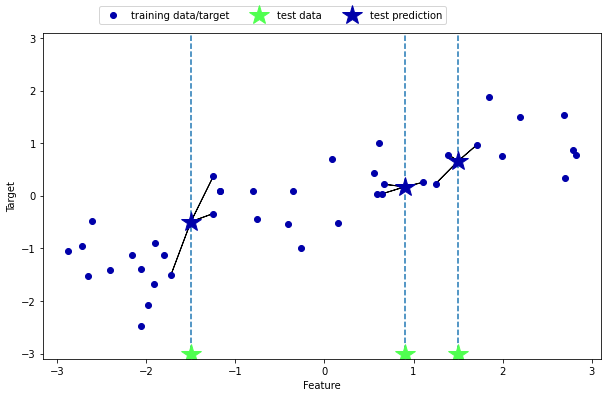

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [19]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of the neigihbors to consider to 3
reg = KNeighborsRegressor(n_neighbors = 3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [20]:
print('Test set Predictions: \n{}'.format(reg.predict(X_test)))

Test set Predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [21]:
print('Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

Test set R^2: 0.83


In [22]:
import numpy as np

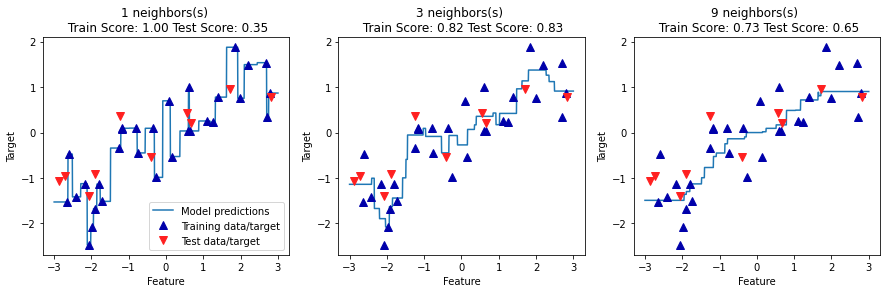

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# create 1000 data points evently spaced between -3 and 3

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax, in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        '{} neighbors(s) \n Train Score: {:.2f} Test Score: {:.2f}'.format(
            n_neighbors, reg.score(X_train, y_train), 
            reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

axes[0].legend(['Model predictions', 'Training data/target', 'Test data/target'], loc='best')

w[0]: 0.393906  b: -0.031804


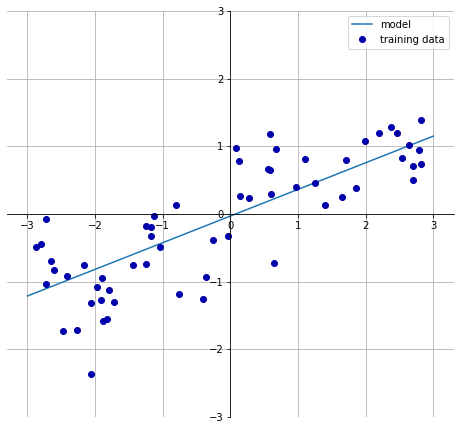

In [24]:
mglearn.plots.plot_linear_regression_wave()

In [27]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [30]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [32]:
print('Training test score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training test score: 0.67
Test set score: 0.66


In [34]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [36]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [38]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('Train set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Train set score: 0.89
Test set score: 0.75


In [40]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [42]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


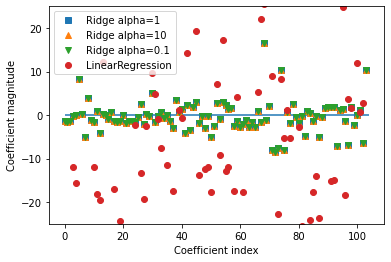

In [45]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()


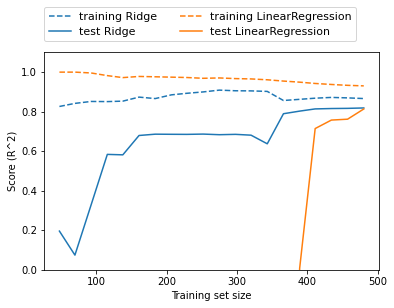

In [47]:
mglearn.plots.plot_ridge_n_samples()

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: {:.2f}'.format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4.00


In [51]:
# increase the default setting of 'max_iter'
# otherwise the mmodel would warn us that we should increase max_iter

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set scoreL {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used: {:.2f}'.format(np.sum(lasso001.coef_ != 0)))

Training set scoreL 0.90
Test set score: 0.77
Number of features used: 33.00


In [53]:
# once again increasing the setting

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set scoreL {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used: {:.2f}'.format(np.sum(lasso00001.coef_ != 0)))

Training set scoreL 0.95
Test set score: 0.64
Number of features used: 96.00


Text(0, 0.5, 'Coefficient magnitude')

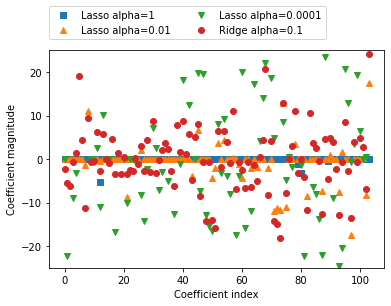

In [55]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')